In [ ]:
!pip install pandas numpy scikit-learn matplotlib seaborn imbalanced-learn

In [ ]:

# 2. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving stroke_prediction_dataset.csv to stroke_prediction_dataset.csv


In [ ]:

# 2. Load dataset
df = pd.read_csv("stroke_prediction_dataset.csv")

# 3. Drop unnecessary columns
df.drop(columns=["Patient.ID", "Patient.Name"], inplace=True, errors='ignore')

# 4. Handle missing values
df.dropna(inplace=True)  # or you can use imputation


Confusion Matrix:
 [[520 730]
 [553 697]]


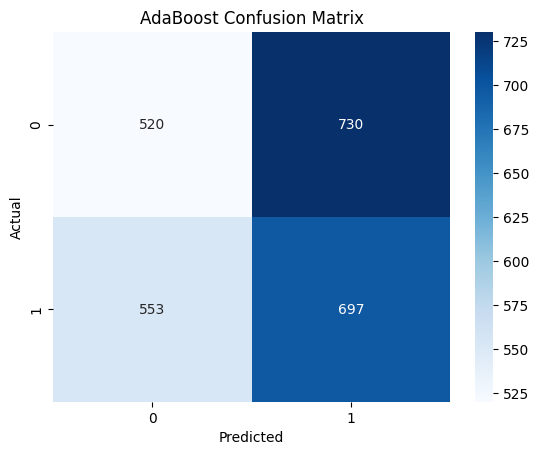

Accuracy: 48.68%


In [ ]:
# 5. Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 6. Split features and target
X = df.drop("Diagnosis", axis=1)
y = df["Diagnosis"]

# 7. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 8. Balance data with SMOTEENN
sm = SMOTEENN(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# 9. Standardize numeric features
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

# 10. Train AdaBoost model
model = AdaBoostClassifier(n_estimators=50, random_state=42)
model.fit(X_train_res, y_train_res)

# 11. Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# 12. Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("AdaBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 13. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

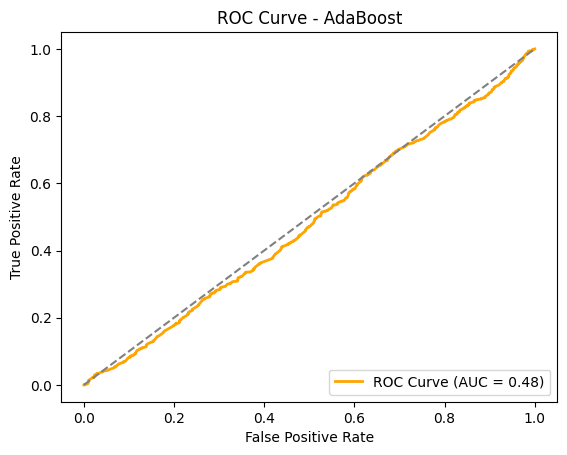

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelBinarizer

# Binarize y_test if it's not already in 0/1
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test).ravel()  # Make sure it's 1D
y_prob = model.predict_proba(X_test)[:, 1]     # Probabilities for the positive class

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test_bin, y_prob)
roc_auc = roc_auc_score(y_test_bin, y_prob)

plt.figure()
plt.plot(fpr, tpr, color='orange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - AdaBoost")
plt.legend(loc="lower right")
plt.show()


In [ ]:
# AdaBoost Hyperparameters
adaboost_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Random Forest Hyperparameters
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


=== AdaBoost ===
Accuracy: 0.4936
AUC: 0.4926
Confusion Matrix:
 [[548 702]
 [564 686]]
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.44      0.46      1250
           1       0.49      0.55      0.52      1250

    accuracy                           0.49      2500
   macro avg       0.49      0.49      0.49      2500
weighted avg       0.49      0.49      0.49      2500


=== Random Forest ===
Accuracy: 0.5052
AUC: 0.5096
Confusion Matrix:
 [[595 655]
 [582 668]]
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.48      0.49      1250
           1       0.50      0.53      0.52      1250

    accuracy                           0.51      2500
   macro avg       0.51      0.51      0.50      2500
weighted avg       0.51      0.51      0.50      2500



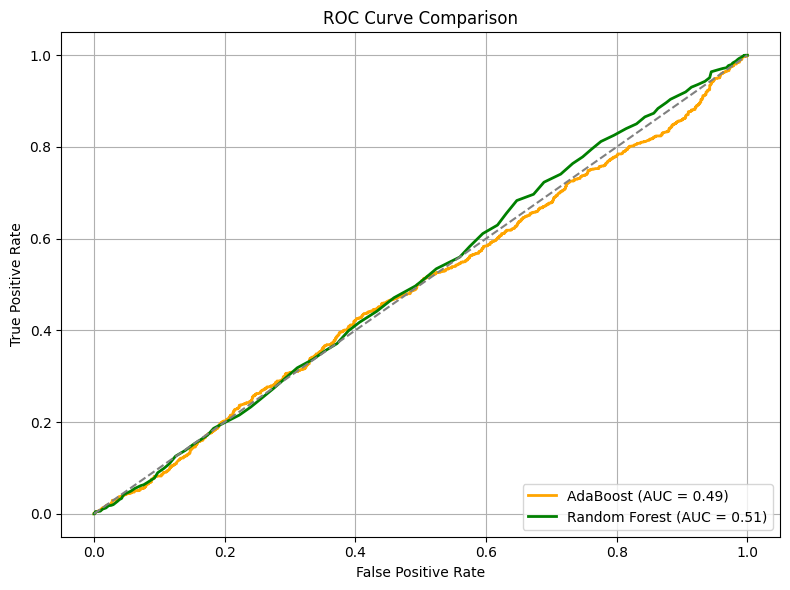

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, LabelBinarizer
from imblearn.combine import SMOTEENN

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    classification_report
)

# ---------- [STEP 1] Encode categorical features ----------
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# ---------- [STEP 2] Split features and target ----------
X = df.drop("Diagnosis", axis=1)
y = df["Diagnosis"]

# ---------- [STEP 3] Train-test split ----------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---------- [STEP 4] Balance data with SMOTEENN ----------
sm = SMOTEENN(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# ---------- [STEP 5] Standardize numeric features ----------
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

# ---------- [STEP 6] Hyperparameter tuning using GridSearchCV ----------

# Define parameter grids
adaboost_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize models
adaboost = AdaBoostClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

# Grid Search
grid_ada = GridSearchCV(adaboost, adaboost_params, cv=5, scoring='roc_auc', n_jobs=-1)
grid_rf = GridSearchCV(rf, rf_params, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit models
grid_ada.fit(X_train_res, y_train_res)
grid_rf.fit(X_train_res, y_train_res)

# Best models
best_ada = grid_ada.best_estimator_
best_rf = grid_rf.best_estimator_

# ---------- [STEP 7] Predictions ----------
y_pred_ada = best_ada.predict(X_test)
y_prob_ada = best_ada.predict_proba(X_test)[:, 1]

y_pred_rf = best_rf.predict(X_test)
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]

# Binarize y_test for ROC
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test).ravel()

# ---------- [STEP 8] Metrics ----------
# Accuracy
acc_ada = accuracy_score(y_test, y_pred_ada)
acc_rf = accuracy_score(y_test, y_pred_rf)

# AUC
auc_ada = roc_auc_score(y_test_bin, y_prob_ada)
auc_rf = roc_auc_score(y_test_bin, y_prob_rf)

# Confusion matrices
cm_ada = confusion_matrix(y_test, y_pred_ada)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("=== AdaBoost ===")
print(f"Accuracy: {acc_ada:.4f}")
print(f"AUC: {auc_ada:.4f}")
print("Confusion Matrix:\n", cm_ada)
print("Classification Report:\n", classification_report(y_test, y_pred_ada))

print("\n=== Random Forest ===")
print(f"Accuracy: {acc_rf:.4f}")
print(f"AUC: {auc_rf:.4f}")
print("Confusion Matrix:\n", cm_rf)
print("Classification Report:\n", classification_report(y_test, y_pred_rf))



# ---------- [STEP 9] ROC Curve ----------
fpr_ada, tpr_ada, _ = roc_curve(y_test_bin, y_prob_ada)
fpr_rf, tpr_rf, _ = roc_curve(y_test_bin, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_ada, tpr_ada, label=f"AdaBoost (AUC = {auc_ada:.2f})", lw=2, color="orange")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})", lw=2, color="green")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation on the resampled and scaled training data
print("=== Cross-Validation Results ===")

# AdaBoost
cv_acc_ada = cross_val_score(best_ada, X_train_res, y_train_res, cv=5, scoring='accuracy')
cv_auc_ada = cross_val_score(best_ada, X_train_res, y_train_res, cv=5, scoring='roc_auc')

print(f"AdaBoost - Accuracy: {cv_acc_ada.mean():.4f} ± {cv_acc_ada.std():.4f}")
print(f"AdaBoost - AUC:      {cv_auc_ada.mean():.4f} ± {cv_auc_ada.std():.4f}")

# Random Forest
cv_acc_rf = cross_val_score(best_rf, X_train_res, y_train_res, cv=5, scoring='accuracy')
cv_auc_rf = cross_val_score(best_rf, X_train_res, y_train_res, cv=5, scoring='roc_auc')

print(f"\nRandom Forest - Accuracy: {cv_acc_rf.mean():.4f} ± {cv_acc_rf.std():.4f}")
print(f"Random Forest - AUC:      {cv_auc_rf.mean():.4f} ± {cv_auc_rf.std():.4f}")


=== Cross-Validation Results ===
AdaBoost - Accuracy: 0.5460 ± 0.0258
AdaBoost - AUC:      0.5658 ± 0.0492

Random Forest - Accuracy: 0.5685 ± 0.0425
Random Forest - AUC:      0.5880 ± 0.0497
